<a href="https://colab.research.google.com/github/joannediaz04/ADVANCED_DATA_WAREHOUSING/blob/main/FINALS_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [4]:
filename = '/content/drive/MyDrive/diaz/titanic.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

<Axes: >

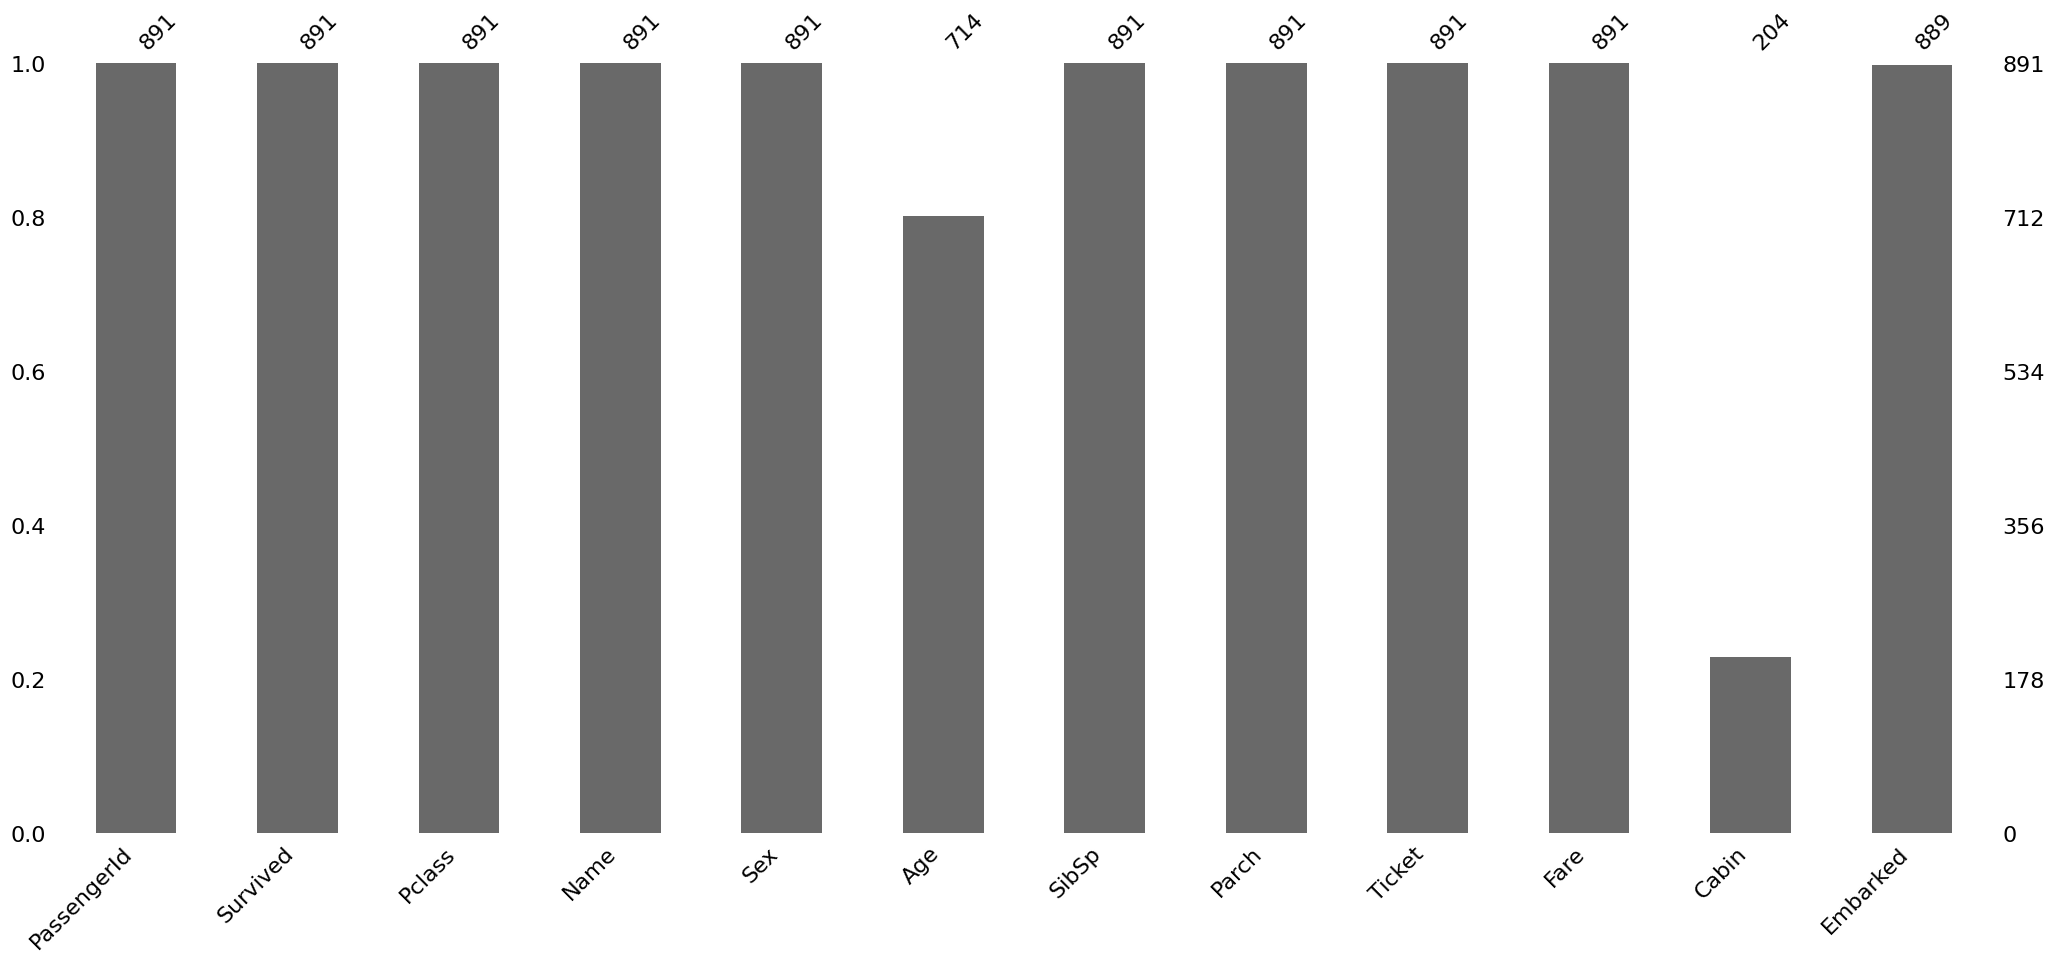

In [7]:
import missingno

missingno.bar(df)

In [8]:
df = df.drop(["PassengerId", "Ticket"], axis=1)

In [9]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].strip().split(" ")[0])

common_titles = ["Mr.", "Miss.", "Mrs."]
df["Title"] = [0 if x in common_titles else 1 for x in df["Title"]]
df["Cabin"] = [0 if str(x) == "nan" else 1 for x in df["Cabin"]]

In [10]:
embarked = pd.get_dummies(df["Embarked"])

In [11]:
df = pd.concat([df, embarked], axis=1)

In [12]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S,0,0,0,1


In [13]:
mean_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()
mean_dr = df[df["Name"].str.contains('Dr.', na=False)]['Age'].mean().round()

print("Mr: ", mean_mr)
print("Miss: ", mean_miss)
print("Mrs: ", mean_mrs)
print("Master: ", mean_master)
print("Dr: ", mean_dr)

Mr:  33.0
Miss:  22.0
Mrs:  36.0
Master:  5.0
Dr:  39.0


In [14]:
ages = {
    "Mr.": 34.0,
    "Miss.": 22.0,
    "Mrs.": 39.0,
    "Master.": 7.0,
    "Dr.": 34.0
}

In [15]:
def age(text):
    name = text[0]
    age = text[1]

    if pd.isnull(age):
        for k, v in ages.items():
            if k in name:
                return v

    else:
        return age

In [16]:
df['Age'] = df[['Name', 'Age']].apply(age, axis=1)

In [17]:
df.drop(["Name", "Embarked"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,C,Q,S
0,0,3,male,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,0,0,1


In [18]:
df = df.dropna(how="any")

<Axes: >

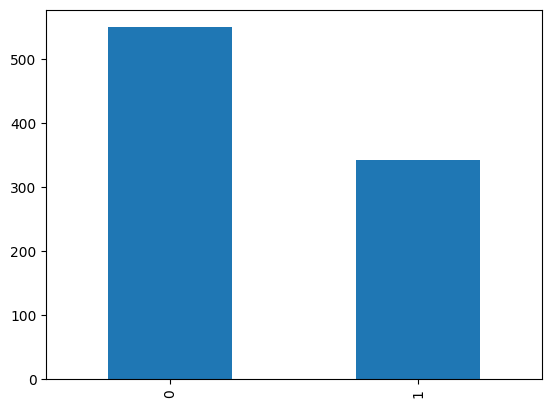

In [19]:
df["Survived"].value_counts().plot(kind="bar")

<Axes: >

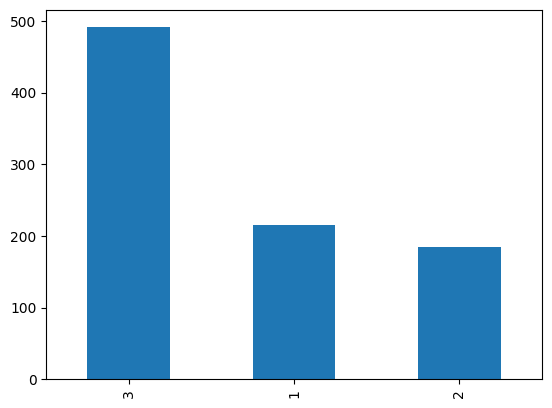

In [20]:
df["Pclass"].value_counts().plot(kind="bar")

<Axes: ylabel='Sex'>

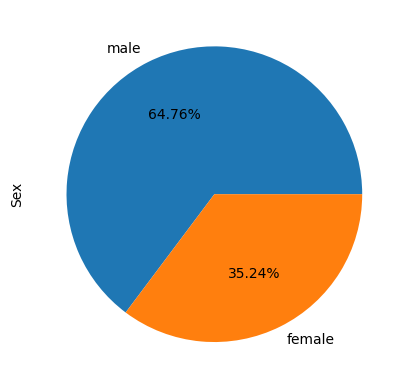

In [21]:
df["Sex"].value_counts().plot(kind="pie", autopct="%.2f%%")

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Cabin'}>,
        <Axes: title={'center': 'Title'}>, <Axes: title={'center': 'C'}>],
       [<Axes: title={'center': 'Q'}>, <Axes: title={'center': 'S'}>,
        <Axes: >]], dtype=object)

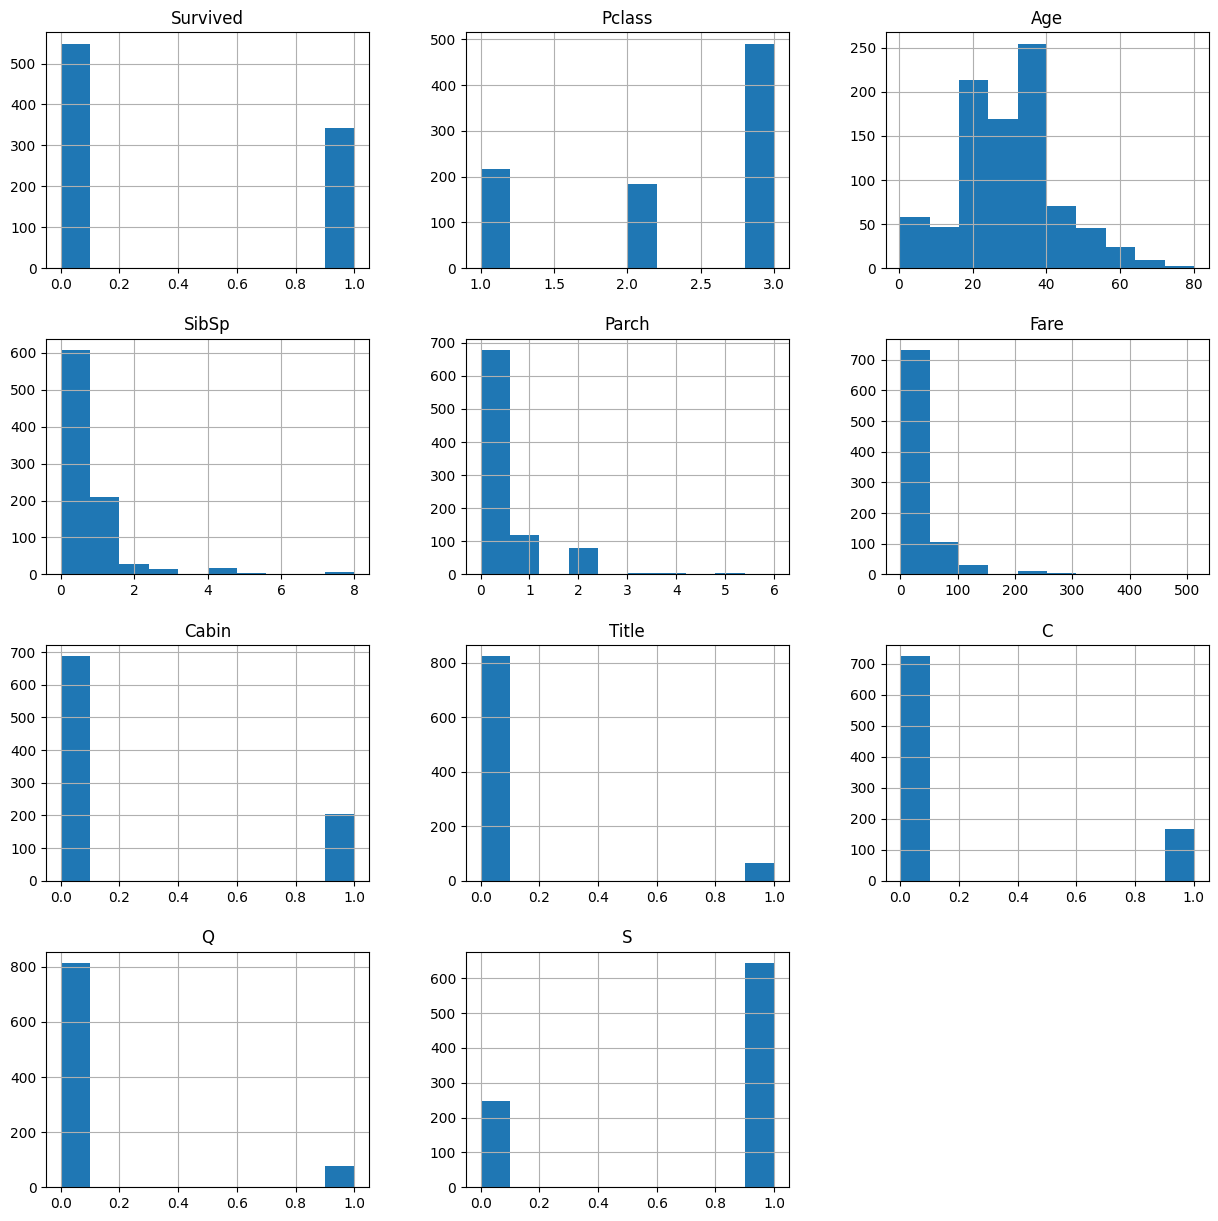

In [22]:
df.hist(figsize=(15, 15))

In [23]:
df["Sex"] = df["Sex"].map({
    "male": 0, "female": 1
})

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,0,1


In [25]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8044692737430168